In [ ]:
!pip install qiskit
!pip install qiskit_machine_learning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from qiskit import QuantumCircuit
from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit.utils import algorithm_globals
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN

algorithm_globals.random_seed = 42

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
dfP=pd.read_csv('/content/drive/MyDrive/BARC/TASK4/dfP.csv')

In [ ]:
dfP.drop('Unnamed: 0',axis=1)

,0,1,2,3,4,5,6,7,8,9,...,993,994,995,996,997,998,999,isDefect,pe,ke
0,0.003825,0.001347,0.005525,-0.001985,-0.006972,-0.005980,-0.000586,0.004626,0.001530,-0.001493,...,-3.043470e-10,-6.031226e-09,5.120979e-09,-7.840872e-09,-2.096650e-09,-5.553725e-09,1.858695e-10,0,-8.902603,0.000895
1,0.001763,-0.008084,0.006813,-0.003498,0.003362,-0.006622,-0.000461,0.001464,0.003428,0.001633,...,4.339737e-09,7.586031e-10,7.171561e-10,1.638719e-09,-2.092131e-09,-4.035567e-10,2.352198e-09,0,-8.904403,0.001491
2,0.004963,0.003467,0.005401,0.003780,-0.003888,-0.004380,-0.006758,0.001401,0.001869,0.001232,...,5.485539e-09,-2.613686e-09,-2.416793e-09,7.815396e-09,6.426876e-09,5.219551e-09,-7.586865e-10,0,-8.899700,0.003025
3,0.003000,-0.001087,0.001941,0.000782,0.001845,0.000707,0.003528,-0.004439,-0.001551,0.000707,...,7.051671e-09,-2.125558e-08,-1.201596e-08,-1.834104e-08,6.512793e-09,1.773464e-08,-2.398885e-08,0,-8.898062,0.003812
4,0.003445,-0.006714,0.000063,0.001721,-0.002016,0.001816,-0.007341,0.005560,0.000230,-0.000056,...,1.078827e-09,7.569973e-09,5.793411e-09,2.474526e-10,2.754343e-09,-4.838079e-09,-5.449803e-09,0,-8.889846,0.003542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3577,-0.002727,0.000586,0.003844,0.000023,-0.001584,-0.001959,-0.000016,0.000593,-0.006628,0.000356,...,-1.216839e-08,-4.109494e-09,2.170579e-08,1.293145e-08,2.201835e-08,-1.515806e-09,-1.783529e-08,1,-8.580639,0.017560
3578,-0.008747,-0.006300,-0.001644,0.001251,0.006700,0.004403,0.003435,0.001464,0.004759,0.000029,...,7.323557e-09,-4.059353e-09,-9.973552e-09,7.784985e-09,-2.720168e-08,8.878110e-09,1.031112e-08,1,-8.547565,0.003423
3579,-0.008084,0.008215,0.000401,-0.003229,0.005353,0.002402,0.000859,0.001315,-0.008147,-0.003508,...,-1.858975e-08,-3.125158e-09,-1.252948e-08,1.558019e-08,-2.164888e-08,3.240638e-08,4.499818e-09,1,-7.802169,0.041790
3580,-0.003191,0.000983,0.007140,-0.000194,-0.000664,-0.000737,-0.004528,0.000588,-0.003859,0.004512,...,2.043884e-09,6.493303e-09,1.189629e-08,1.569604e-08,-6.772935e-09,3.414580e-09,-1.798798e-08,1,-8.848695,0.017325


In [ ]:
X = dfP.iloc[:, 1:5].values #dfP
Y=dfP.iloc[:,-2].values


In [ ]:
X.shape

(3582, 4)

In [ ]:
num_inputs=4


In [ ]:
# # construct simple feature map
feature_map = ZZFeatureMap(4)
# param_x = Parameter("x[0]","x[1]")
# feature_map = QuantumCircuit(2, name="fm")
# feature_map.ry(param_x, 0)

# # construct simple ansatz
ansatz = RealAmplitudes(4)
# param_y = Parameter("x[1]")
# ansatz = QuantumCircuit(2, name="vf")
# ansatz.ry(param_y, 0)

# construct a circuit
qc = QuantumCircuit(4)
qc.compose(feature_map, inplace=True)
qc.compose(ansatz, inplace=True)

# construct QNN
regression_estimator_qnn = EstimatorQNN(
    circuit=qc, input_params=feature_map.parameters, weight_params=ansatz.parameters
)

In [ ]:
# callback function that draws a live plot when the .fit() method is called
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [ ]:
# construct the regressor from the neural network
regressor = NeuralNetworkRegressor(
    neural_network=regression_estimator_qnn,
    loss="squared_error",
    optimizer=L_BFGS_B(maxiter=5),
    callback=callback_graph,
)

In [ ]:
X.shape

(3582, 4)

In [ ]:
Y.shape

(3582,)

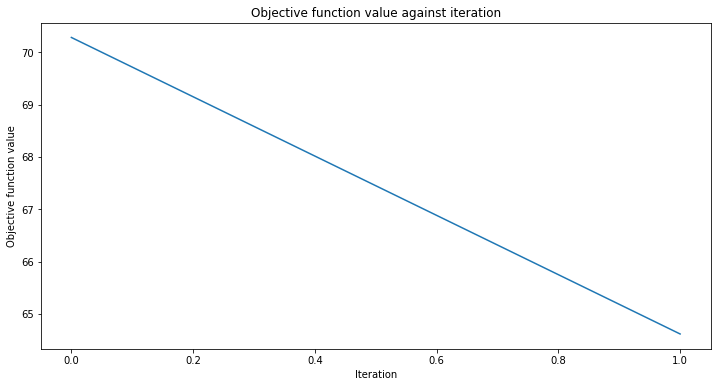

In [ ]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit to data
regressor.fit(X, Y)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score the result
regressor.score(X, Y)



## VQC

In [ ]:
vqr = VQR(
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=L_BFGS_B(maxiter=5),
    callback=callback_graph,
)

In [ ]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit regressor
vqr.fit(X, Y)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score result
vqr.score(X, Y)

In [ ]:
# plot target function
plt.plot(X, Y, "r--")

# plot data
plt.plot(X, Y, "bo")

# plot fitted line
y_ = vqr.predict(X)
plt.plot(X, y_, "g-")
plt.show()